In [ ]:
# Assignment 1

## Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_dataset(filename: str):
    data = np.loadtxt(filename)
    print(f"Loaded {len(data)} samples from {filename}")
    return data

In [3]:
Xtrain = load_dataset("Xtrain.csv")
Xtest = load_dataset("Xtest.csv")
Ytrain = load_dataset("Ytrain.csv")

Loaded 3000 samples from Xtrain.csv
Loaded 3000 samples from Xtest.csv
Loaded 3000 samples from Ytrain.csv


Text(0, 0.5, 'Number of samples')

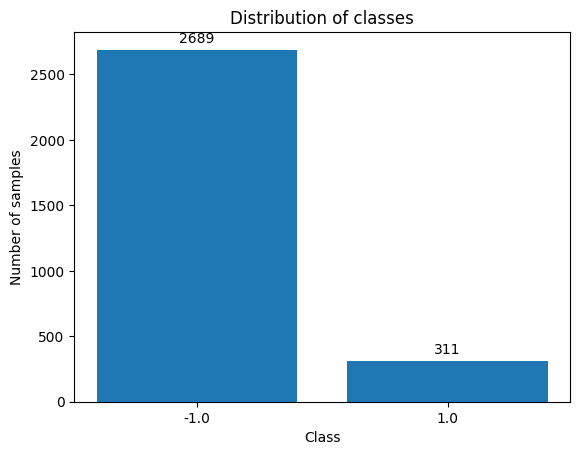

In [14]:
training_classes_counts = np.unique(Ytrain, return_counts=True)
fig, ax = plt.subplots()
bars = ax.bar(list(map(str, training_classes_counts[0])), training_classes_counts[1])
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom')
plt.title("Distribution of classes")
plt.xlabel("Class")
plt.ylabel("Number of samples")


i.

a. There are 3000 examples in the training set and 3000 in the test set.

b. The training data has 2689 negative examples and 311 positive examples. There are almost 9 times as many negative examples as positive ones. This unbalanced dataset means that our classifier may not be as good at identifying features of the positive class. This can be rectified in training by oversampling the positive examples so that our classifier doesn't get biased to predicting the negative majority class (if this distribution is not representative of a real world distribution).

In [35]:
def show_random_samples(dataset, title, labels=None):
    random_samples_count = 10
    random_samples_indices = np.random.choice(len(Xtrain), size=random_samples_count, replace=False)
    random_samples = dataset[random_samples_indices]
    if labels is not None:
        random_samples_labels = labels[random_samples_indices]
    random_samples = np.reshape(random_samples, (random_samples_count, 28, 28))
    fig, axs = plt.subplots(2, 5)
    fig.set_figwidth(10)
    for i, sample in enumerate(random_samples):
        axs.flat[i].matshow(sample)
        if labels is not None:
            axs.flat[i].set_title(str(random_samples_labels[i]))
    fig.suptitle(title, size=14)
    fig.tight_layout()

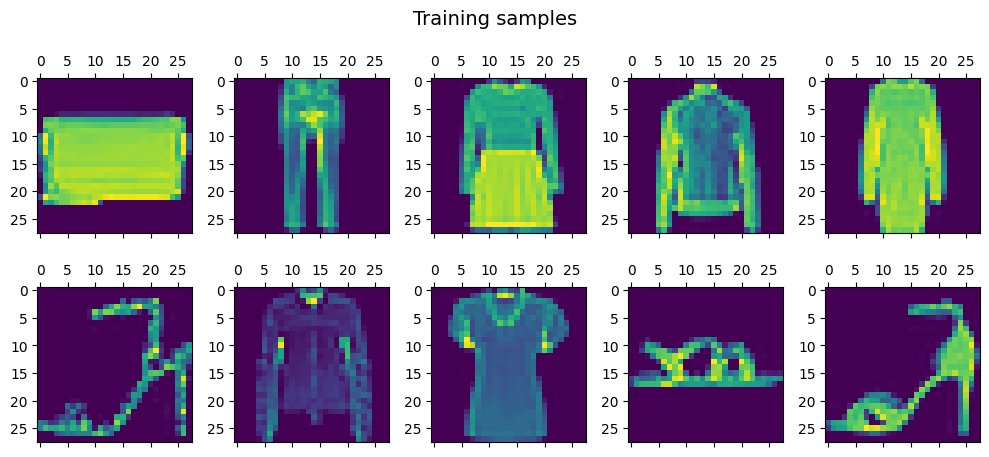

In [43]:
show_random_samples(Xtrain, "Training samples")

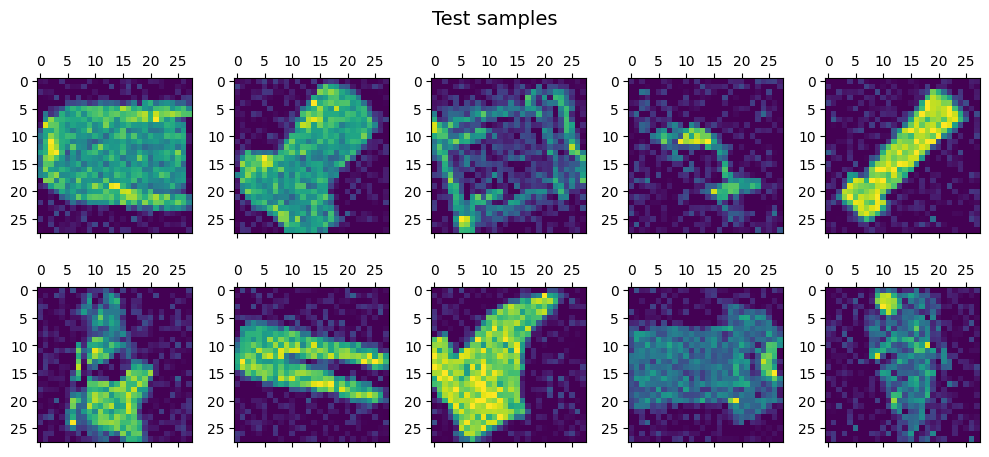

In [32]:
show_random_samples(Xtest, "Test samples")

ii.

a.

The samples look like items of clothing. They are all the right orientation, high contrast and well positioned.

b.

The test set samples are noisy and have random orientations. These will both pose problems for the classifier. The noise means the features are less defined, and the different orientations present different features entirely.

iii.

The F1 score combines precision and recall into a single metric and is useful when there is an uneven class distribution. It gives equal weight to both precision and recall and is particularly effective for binary classification tasks with imbalanced class distributions - as is our case here.

iv.

Since there are only two labels, the classifier would choose them with equal 0.5 probability. so given any sample $x$ with a label $y$ and predicted label $\hat y$, it holds that $\mathbb{P}(\hat y = y) = \mathbb{P}(y = 1)\mathbb{P}(\hat y = 1) + \mathbb{P}(y = -1) \mathbb{P}(\hat y = -1) = 0.5(\mathbb{P}(y = 1)+\mathbb{P}(y = -1)) = 0.5$. So, given any distribution of classes, a random classifier would have an accuracy of $0.5$.